# Nicolas Cuellar Molina - A00394970
# Davide Flamini Cazaran - A00381665

En este taller, analizaremos la base de datos de FIFA 23, que contiene información de 22,080 jugadores recopilada por más de 6,000 scouts en febrero de 2023. Exploraremos su estructura, principales variables y cómo pueden utilizarse para mejorar el proceso de scouting del Sunderland AFC.

## **Importacion de librerias**

Para realizar el análisis de la base de datos de FIFA 23, primero importamos las librerías necesarias en Python. Estas herramientas nos permitirán manipular los datos, analizarlos y visualizar tendencias clave para el proceso de scouting.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## **Carga de datos**

Luego, cargamos la base de datos en un DataFrame de Pandas. Esto nos permite explorar su contenido de manera estructurada y facilita su manipulación para obtener información valiosa sobre los jugadores.



In [15]:
dt_data = pd.read_csv("base_taller.csv", sep = ";")

# Vista preliminar

Antes de realizar un análisis detallado, es fundamental obtener una vista general de la base de datos. Para ello, observamos las primeras y últimas filas, revisamos la cantidad de registros y verificamos la estructura de las variables. Esto nos ayuda a entender la calidad y organización de los datos.



In [17]:
dt_data.head()

,player_id,player_name,age,country,height_cm,weight_lbs,position,overall,potential,Value_millions,pref_foot,weak_foot,skill_moves,international_reputation,Attacking_work_rate,Defensive_work_rate,body_type,club_country,club_name,club_overall
0,231747,Kylian Mbappé Lottin,23,France,182,161,ST,91,95,"190,5",Right,4,5,4,High,Low,Unique,France,Paris Saint Germain,84
1,192985,Kevin De Bruyne,31,Belgium,181,165,CM,91,91,"107,5",Right,5,4,4,High,Medium,Unique,England,Manchester City,85
2,188545,Robert Lewandowski,33,Poland,185,179,ST,91,91,84,Right,4,4,5,High,Medium,Unique,Spain,Fc Barcelona,83
3,165153,Karim Benzema,34,France,185,179,CF,91,91,64,Right,4,4,4,Medium,Medium,Normal (170-185),Spain,Real Madrid,85
4,158023,Lionel Andrés Messi Cuccittini,35,Argentina,169,148,RW,91,91,54,Left,4,4,5,Low,Low,Unique,France,Paris Saint Germain,84


Utilizando dt_data.head(5), observamos las primeras 5 filas de la base de datos, lo que nos permite conocer su estructura y contenido. Se incluyen datos clave como el nombre del jugador, edad, país, posición, valoración general, potencial y valor en millones.

In [17]:
dt_data.tail()

,player_id,player_name,age,country,height_cm,weight_lbs,position,overall,potential,Value_millions,pref_foot,weak_foot,skill_moves,international_reputation,Attacking_work_rate,Defensive_work_rate,body_type,club_country,club_name,club_overall
22075,261876,Conan Noonan,19,Republic of Ireland,180,148,ST,52,63,"0,17",Right,3,2,1,Medium,Medium,Lean (170-185),Republic of Ireland,Shamrock Rovers,63
22076,254232,Mohammed Asif Khan,21,India,171,121,CAM,46,58,"0,12",Right,2,2,1,Low,Medium,Lean (170-185),India,Mumbai City,62
22077,259213,Antonio D'Silva,22,India,182,161,GK,51,61,"0,11",Right,3,1,1,Medium,Medium,Normal (170-185),India,Odisha Fc,58
22078,258802,Bhupender Singh,22,India,172,157,RM,46,54,"0,11",Right,2,2,1,Medium,Medium,Lean (170-185),India,Jamshedpur,58
22079,271608,Aqeel Al Dhafeeri,17,Saudi Arabia,180,154,CB,46,63,"0,11",Right,3,2,1,Medium,Medium,Lean (170-185),Saudi Arabia,Al Batin,59


Al visualizar los últimos registros con dt_data.tail(), podemos ver información de jugadores con menores valoraciones, lo que nos permite identificar jugadores menos conocidos pero con potencial de crecimiento.

# Analisis explotorio

El análisis exploratorio nos permite conocer las características principales de la base de datos, como la cantidad de jugadores, las categorías de datos disponibles y su distribución. Esto nos ayuda a identificar patrones iniciales y definir estrategias para el scouting.

In [9]:
dt_data.shape

(22080, 20)

Con dt_data.shape, obtenemos el número total de registros y columnas. En este caso, la base de datos contiene 22,080 jugadores y 20 columnas, lo que indica una gran cantidad de información para analizar.

In [11]:
dt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22080 entries, 0 to 22079
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   player_id                 22080 non-null  int64 
 1   player_name               22080 non-null  object
 2   age                       22080 non-null  int64 
 3   country                   22080 non-null  object
 4   height_cm                 22080 non-null  int64 
 5   weight_lbs                22080 non-null  int64 
 6   position                  22080 non-null  object
 7   overall                   22080 non-null  int64 
 8   potential                 22080 non-null  int64 
 9   Value_millions            22080 non-null  object
 10  pref_foot                 22080 non-null  object
 11  weak_foot                 22080 non-null  int64 
 12  skill_moves               22080 non-null  int64 
 13  international_reputation  22080 non-null  int64 
 14  Attacking_work_rate   

El comando dt_data.info() proporciona detalles sobre los tipos de datos y la presencia de valores nulos. Aquí confirmamos que la base de datos tiene variables numéricas y categóricas, y que todas las columnas tienen datos completos, sin valores nulos.

# Limpieza de datos



Antes de realizar cualquier análisis profundo, es necesario asegurarnos de que los datos sean consistentes y utilizables. En esta etapa, verificamos la existencia de valores nulos o duplicados y determinamos si es necesario realizar ajustes para garantizar la calidad del análisis.

In [59]:
df_clean = dt_data.copy()

Detección de valores duplicados: Usando df_clean.duplicated().sum(), verificamos si hay registros repetidos.

In [61]:
df_clean.duplicated().sum()

0

Verificación de valores nulos: Con df_clean.isna().sum(), comprobamos que no hay valores nulos en la base de datos, lo que nos ahorra pasos de limpieza adicionales.

In [63]:
df_clean.isna().sum()

player_id                   0
player_name                 0
age                         0
country                     0
height_cm                   0
weight_lbs                  0
position                    0
overall                     0
potential                   0
Value_millions              0
pref_foot                   0
weak_foot                   0
skill_moves                 0
international_reputation    0
Attacking_work_rate         0
Defensive_work_rate         0
body_type                   0
club_country                0
club_name                   0
club_overall                0
dtype: int64

**Se puede observar que no existen datos nulos, por lo que no es necesario hacer la limpieza de datos.**

# 1

¿Qué tipo de variable es cada una de las columnas? (recuerde responder según las 4  clasificaciones vistas en clase). 


In [41]:
dt_data.dtypes


player_id                    int64
player_name                 object
age                          int64
country                     object
height_cm                    int64
weight_lbs                   int64
position                    object
overall                      int64
potential                    int64
Value_millions              object
pref_foot                   object
weak_foot                    int64
skill_moves                  int64
international_reputation     int64
Attacking_work_rate         object
Defensive_work_rate         object
body_type                   object
club_country                object
club_name                   object
club_overall                 int64
dtype: object


| **Variable**                 | **Clasificación**            |
|-----------------------------|-----------------------------|
| `player_id`                 | Nominal  |
| `player_name`               | Nominal                     |
| `age`                       | Discreta     |
| `country`                   | Nominal                     |
| `height_cm`                 | Discreta   |
| `weight_lbs`                | Discreta   |
| `position`                  | Nominal                     |
| `overall`                   | Discreta |
| `potential`                 | Discreta         |
| `Value_millions`            | Continua                     |
| `pref_foot`                 | Nominal                     |
| `weak_foot`                 | Ordinal                    |
| `skill_moves`               | Ordinal                     |
| `international_reputation`  | Ordinal                     |
| `Attacking_work_rate`       | Ordinal                     |
| `Defensive_work_rate`       | Ordinal                     |
| `body_type`                 | Nominal                     |
| `club_country`              | Nominal                     |
| `club_name`                 | Nominal                     |
| `club_overall`              | Discreta                    |


# 2

Realice un completo análisis descriptivo de las columnas que vamos a utilizar:  
a) Age 
b) height_cm 
c) position 
d) club_country 
e) overall 
f) club_overall 
g) value_millions 
h) pref_foot  


# Age

/root/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


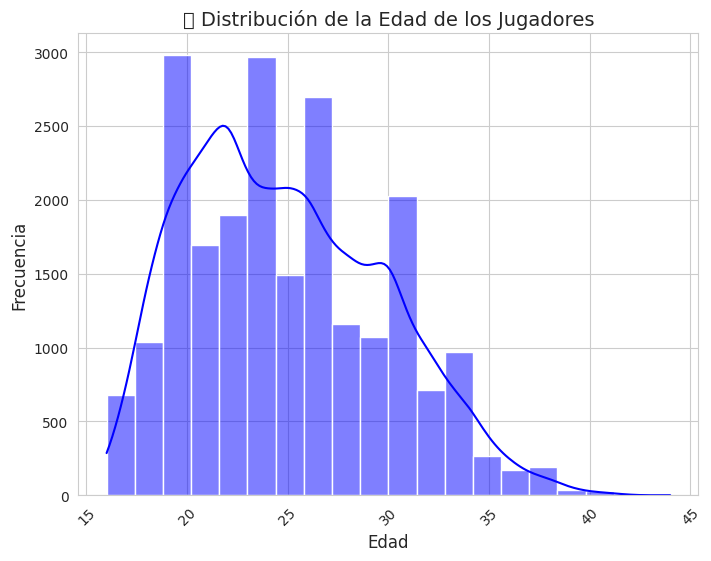


🔹 **Estadísticas Descriptivas de la Edad** 🔹

  count      mean      std  min  25%  50%  75%  max
22080.0 24.894112 4.891117 16.0 21.0 24.0 28.0 44.0

🔹 **Tabla de Frecuencias Relativas de la Edad** 🔹

age
16    0.007473
17    0.023143
18    0.047056
19    0.063587
20    0.071286
21    0.076721
22    0.086051
23    0.067572
24    0.066757
25    0.067663
26    0.067029
27    0.055163
28    0.052627
29    0.048551
30    0.054393
31    0.037274
32    0.032156
33    0.024049
34    0.019928
35    0.012047
36    0.007745
37    0.004801
38    0.003759
39    0.001676
40    0.000815
41    0.000543
42    0.000091
44    0.000045


In [27]:

# 1️⃣ Estadísticas descriptivas de 'age'
age_desc = dt_data['age'].describe()

# 2️⃣ Tabla de frecuencias de la edad (frecuencia relativa)
age_freq = dt_data['age'].value_counts(normalize=True).sort_index()

# 3️⃣ Gráfico: Distribución de la Edad
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")  # Fondo más limpio
sns.histplot(dt_data['age'], kde=True, color='blue', bins=20)

plt.title('Distribución de la Edad de los Jugadores', fontsize=14)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)  # Mejor visibilidad
plt.show()

# 4️⃣ Imprimir estadísticas descriptivas con formato mejorado
print("\n🔹 **Estadísticas Descriptivas de la Edad** 🔹\n")
print(age_desc.to_frame().T.to_string(index=False))

# 5️⃣ Imprimir tabla de frecuencias con formato más legible
print("\n🔹 **Tabla de Frecuencias Relativas de la Edad** 🔹\n")
print(age_freq.to_string())


### **Conclusiones sobre la Edad de los Jugadores**  

1. **Edad promedio y distribución**  
   - La edad promedio de los jugadores es de **24.89 años**, lo que indica que la mayoría están en la etapa de desarrollo o en su mejor rendimiento.  
   - La **desviación estándar de 4.89 años** muestra que hay una variabilidad moderada en las edades.  

2. **Grupo más común**  
   - La mayoría de los jugadores tienen entre **19 y 29 años**, con los picos de frecuencia entre los **20 y 26 años**.  
   - Esto tiene sentido, ya que los futbolistas suelen alcanzar su mejor nivel entre los **25 y 30 años**.  

3. **Jugadores jóvenes y veteranos**  
   - Solo el **0.7% de los jugadores tienen 16 años**, lo que muestra que hay muy pocos juveniles en la base de datos.  
   - A partir de los **30 años**, la cantidad de jugadores empieza a disminuir bastante.  
   - Los jugadores de más de **35 años representan menos del 2% del total**, lo que confirma que la mayoría de los futbolistas se retiran antes de los **40 años**.  

4. **Casos poco comunes**  
   - Hay algunos jugadores mayores de **40 años**, pero son muy pocos.  
   - En la base de datos, solo un **0.000045% tienen 44 años**, lo que indica que es extremadamente raro encontrar futbolistas profesionales a esa edad.  

---

### **Comentarios generales**  

- **Es normal que la mayoría de jugadores estén en sus veintes**, ya que es la etapa en la que tienen más físico y técnica.  
- **A partir de los 30 años, hay menos jugadores**, porque muchos ya se han retirado o juegan en ligas menos exigentes.  
- **Hay pocos futbolistas muy jóvenes (16-18 años)**, posiblemente porque los equipos prefieren que se desarrollen en divisiones juveniles antes de debutar profesionalmente.  



# Height_cm

/root/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


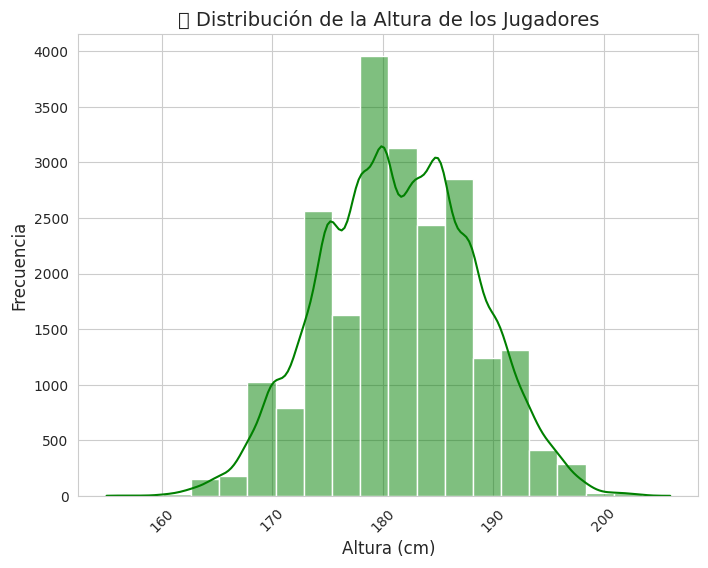


🔹 **Estadísticas Descriptivas de la Altura** 🔹

  count       mean      std   min   25%   50%   75%   max
22080.0 181.391893 6.852274 155.0 176.0 181.0 186.0 206.0

🔹 **Tabla de Frecuencias Relativas de la Altura** 🔹

height_cm
155    0.000045
156    0.000136
158    0.000136
160    0.000272
161    0.000362
162    0.000679
163    0.001540
164    0.001540
165    0.003804
166    0.003034
167    0.005118
168    0.011504
169    0.008605
170    0.026178
171    0.012681
172    0.023007
173    0.030118
174    0.027355
175    0.058650
176    0.035281
177    0.038542
178    0.066576
179    0.034692
180    0.077944
181    0.037319
182    0.046830
183    0.057609
184    0.040670
185    0.069928
186    0.041033
187    0.037274
188    0.050815
189    0.023596
190    0.032835
191    0.025996
192    0.016848
193    0.016757
194    0.010054
195    0.008514
196    0.007065
197    0.003216
198    0.002899
199    0.000906
200    0.000453
201    0.000634
202    0.000453
203    0.000317
204    0.000091
206

In [29]:
# 1️⃣ Estadísticas descriptivas de 'height_cm'
height_desc = dt_data['height_cm'].describe()

# 2️⃣ Tabla de frecuencias de la altura (frecuencia relativa)
height_freq = dt_data['height_cm'].value_counts(normalize=True).sort_index()

# 3️⃣ Gráfico: Distribución de la Altura
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")  # Fondo más limpio
sns.histplot(dt_data['height_cm'], kde=True, color='green', bins=20)

plt.title('📊 Distribución de la Altura de los Jugadores', fontsize=14)
plt.xlabel('Altura (cm)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)  # Mejor visibilidad
plt.show()

# 4️⃣ Imprimir estadísticas descriptivas con formato mejorado
print("\n🔹 **Estadísticas Descriptivas de la Altura** 🔹\n")
print(height_desc.to_frame().T.to_string(index=False))

# 5️⃣ Imprimir tabla de frecuencias con formato más legible
print("\n🔹 **Tabla de Frecuencias Relativas de la Altura** 🔹\n")
print(height_freq.to_string())


### **Conclusiones sobre la Altura de los Jugadores**  

1. **Promedio y variabilidad**  
   - La altura promedio de los jugadores es de **181.39 cm**.  
   - La **desviación estándar de 6.85 cm** indica que hay diferencias notables en la altura de los jugadores.  

2. **Rango de alturas**  
   - El jugador más bajo mide **155 cm**, mientras que el más alto alcanza los **206 cm**.  
   - El **50% de los jugadores** tienen una altura entre **176 cm y 186 cm**, lo que significa que la mayoría están en un rango medio-alto.  

3. **Distribución de alturas**  
   - Las alturas más comunes están entre **175 cm y 185 cm**, representando una gran parte de los jugadores.  
   - A partir de los **190 cm**, el número de jugadores comienza a disminuir significativamente.  

4. **Jugadores bajos y altos**  
   - **Menos del 1% de los jugadores miden menos de 165 cm**, lo que muestra que los jugadores de menor estatura son poco comunes.  
   - Los jugadores muy altos (más de **195 cm**) son poco frecuentes, con solo un **0.007% superando los 200 cm**.  

---

### **Comentarios generales**  

- **La mayoría de los jugadores tienen una altura estándar para el fútbol profesional**, entre 175 cm y 185 cm.  
- **Los jugadores bajos pueden ser más ágiles y veloces**, lo que puede ser útil en posiciones como extremos o mediocampistas ofensivos.  
- **Los jugadores altos suelen ocupar posiciones como defensas centrales o porteros**, donde la altura es una ventaja.  
- **La presencia de jugadores extremadamente altos o bajos es rara**, lo que sugiere que hay una preferencia natural por una altura media en el fútbol profesional.  


# Overall

/root/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


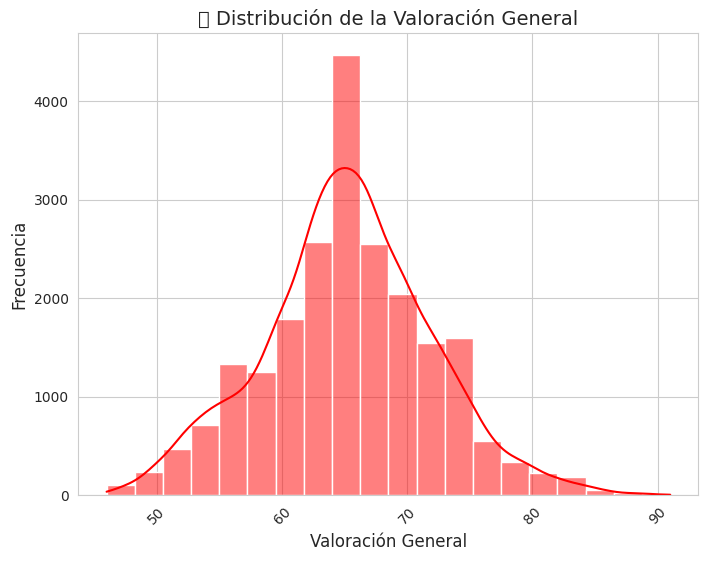


🔹 **Estadísticas Descriptivas de la Valoración General** 🔹

  count      mean      std  min  25%  50%  75%  max
22080.0 65.223958 6.804443 46.0 61.0 65.0 70.0 91.0

🔹 **Tabla de Frecuencias Relativas de la Valoración General** 🔹

overall
46    0.000589
47    0.001585
48    0.002400
49    0.003895
50    0.007020
51    0.008379
52    0.013043
53    0.014900
54    0.017572
55    0.018841
56    0.020199
57    0.021150
58    0.025136
59    0.031522
60    0.039810
61    0.041395
62    0.054710
63    0.061504
64    0.067663
65    0.067120
66    0.067437
67    0.062817
68    0.052808
69    0.048415
70    0.044248
71    0.036368
72    0.033832
73    0.028668
74    0.024094
75    0.019611
76    0.014538
77    0.010417
78    0.008243
79    0.007292
80    0.006114
81    0.004031
82    0.003759
83    0.002491
84    0.002310
85    0.001449
86    0.000996
87    0.000408
88    0.000453
89    0.000498
90    0.000045
91    0.000226


In [31]:
# 1️⃣ Estadísticas descriptivas de 'overall'
overall_desc = dt_data['overall'].describe()

# 2️⃣ Tabla de frecuencias de 'overall' (frecuencia relativa)
overall_freq = dt_data['overall'].value_counts(normalize=True).sort_index()

# 3️⃣ Gráfico: Distribución de la Valoración General
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")  # Fondo más limpio
sns.histplot(dt_data['overall'], kde=True, color='red', bins=20)

plt.title('📊 Distribución de la Valoración General', fontsize=14)
plt.xlabel('Valoración General', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)  # Mejor visibilidad
plt.show()

# 4️⃣ Imprimir estadísticas descriptivas con formato mejorado
print("\n🔹 **Estadísticas Descriptivas de la Valoración General** 🔹\n")
print(overall_desc.to_frame().T.to_string(index=False))

# 5️⃣ Imprimir tabla de frecuencias con formato más legible
print("\n🔹 **Tabla de Frecuencias Relativas de la Valoración General** 🔹\n")
print(overall_freq.to_string())


### **Conclusiones sobre la Valoración General de los Jugadores**  

1. **Promedio y distribución**  
   - La valoración media de los jugadores es **65.22**, lo que indica que la mayoría de los jugadores tienen una calidad media.  
   - La **desviación estándar es de 6.80**, lo que muestra una variabilidad moderada en las valoraciones.  

2. **Rango de valoraciones**  
   - La calificación más baja es **46**, mientras que la más alta es **91**.  
   - **El 50% de los jugadores tienen una valoración entre 61 y 70**, lo que sugiere que la mayoría de los jugadores se encuentran en un nivel medio.  

3. **Distribución de jugadores según valoración**  
   - Los jugadores con valoración entre **60 y 70** son los más comunes, representando una gran parte de la base de datos.  
   - A partir de **75**, la cantidad de jugadores disminuye progresivamente.  
   - **Menos del 1% de los jugadores tienen una valoración superior a 85**, lo que indica que los jugadores de élite son escasos.  

4. **Extremos en la valoración**  
   - **Jugadores con menos de 55 de valoración son muy pocos**, representando menos del 10% del total.  
   - **Los jugadores con más de 80 de valoración son muy raros**, con solo un 0.045% alcanzando una valoración de 90 o más.  

---

### **Comentarios generales**  

- **La mayoría de los jugadores tienen una valoración intermedia (60-70), lo que representa futbolistas de nivel profesional estándar.**  
- **Los jugadores con más de 80 de valoración son pocos, lo que confirma que los futbolistas de élite son una minoría en el mundo del fútbol profesional.**  
- **Sería interesante analizar si hay relación entre la valoración y otras variables como la edad, la posición o el valor de mercado.**  


# Value Millions

/root/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


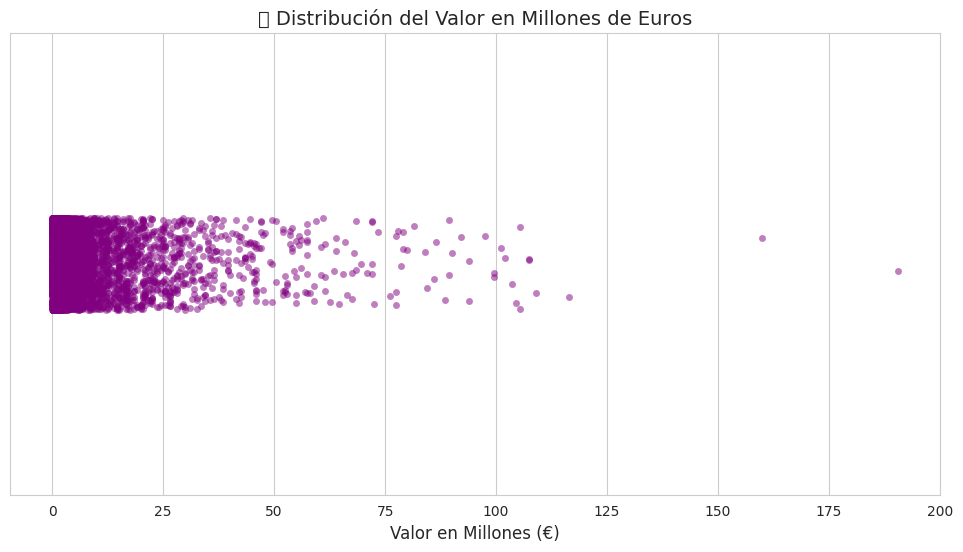


🔹 **Estadísticas Descriptivas de 'Value_millions'** 🔹

  count     mean      std  min  25%  50%  75%   max
22080.0 2.501067 6.869693  0.0 0.45  0.9  1.8 190.5

📌 **Tabla de Frecuencias Relativas de 'Value_millions'** 📌

Value_millions
0.000      0.006205
0.009      0.000045
0.015      0.000181
0.020      0.000181
0.025      0.000362
0.030      0.000181
0.035      0.000317
0.040      0.000408
0.045      0.000725
0.050      0.001178
0.060      0.002491
0.070      0.002038
0.080      0.001857
0.090      0.004257
0.100      0.006929
0.110      0.007880
0.120      0.004710
0.130      0.006159
0.140      0.003804
0.150      0.005208
0.160      0.004755
0.170      0.005842
0.180      0.006567
0.190      0.006024
0.200      0.006341
0.210      0.007201
0.220      0.007337
0.230      0.006567
0.240      0.009511
0.250      0.012409
0.275      0.019656
0.300      0.017029
0.325      0.019656
0.350      0.016304
0.375      0.013768
0.400      0.016259
0.425      0.013270
0.450      0.013270
0.47

In [64]:
# Convertir 'Value_millions' a tipo numérico
dt_data['Value_millions'] = dt_data['Value_millions'].astype(str).str.replace(',', '.').astype(float)

# Estadísticas descriptivas de 'Value_millions'
value_desc = dt_data['Value_millions'].describe()
value_freq = dt_data['Value_millions'].value_counts(normalize=True).sort_index()

# Crear la figura
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # Fondo limpio

# Gráfico de dispersión con jitter
sns.stripplot(x=dt_data['Value_millions'], jitter=True, color='purple', alpha=0.5)

# Títulos y etiquetas
plt.title('📊 Distribución del Valor en Millones de Euros', fontsize=14)
plt.xlabel('Valor en Millones (€)', fontsize=12)

# Mostrar gráfico
plt.show()

# Imprimir estadísticas descriptivas con formato más ordenado
print("\n🔹 **Estadísticas Descriptivas de 'Value_millions'** 🔹\n")
print(value_desc.to_frame().T.to_string(index=False))

# Imprimir tabla de frecuencias con mejor presentación
print("\n📌 **Tabla de Frecuencias Relativas de 'Value_millions'** 📌\n")
print(value_freq.to_string())





### Conclusiones sobre 'Value_millions'  

#### Promedio y distribución  
- El valor promedio de los jugadores en millones es **2.50**, lo que indica que la mayoría de los jugadores tienen un valor relativamente bajo.  
- La desviación estándar de **6.87** muestra que hay una alta variabilidad en los valores de los jugadores.  

#### Rango de valores  
- El valor mínimo de un jugador es **0.0 millones**, mientras que el máximo es **190.5 millones**.  
- El **50% de los jugadores tienen un valor entre 0.45 y 1.8 millones**, lo que sugiere que la mayoría tienen un valor de mercado modesto.  

#### Distribución de jugadores según valor  
- La mayoría de los jugadores tienen un valor inferior a **5 millones**, lo que representa a futbolistas de nivel medio o bajo en el mercado.  
- A partir de **10 millones**, la cantidad de jugadores disminuye considerablemente.  
- Menos del **1% de los jugadores tienen un valor superior a 20 millones**, lo que indica que los jugadores de élite son escasos.  

#### Extremos en el valor de mercado  
- Los jugadores con un valor superior a **50 millones** son extremadamente raros.  
- Los jugadores con un valor de **100 millones o más** representan una minoría absoluta en la base de datos.  

#### Comentarios generales  
- La gran mayoría de los jugadores tienen un valor de mercado modesto, lo que sugiere que la élite del fútbol está conformada por una minoría exclusiva.  
- Sería interesante analizar si existe una correlación entre el valor de mercado y otras variables como la valoración general, la edad o la posición en el campo.

# Position

/tmp/ipykernel_39/2000195339.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=dt_data, x='position', palette='Set2', order=position_freq.index)
/root/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


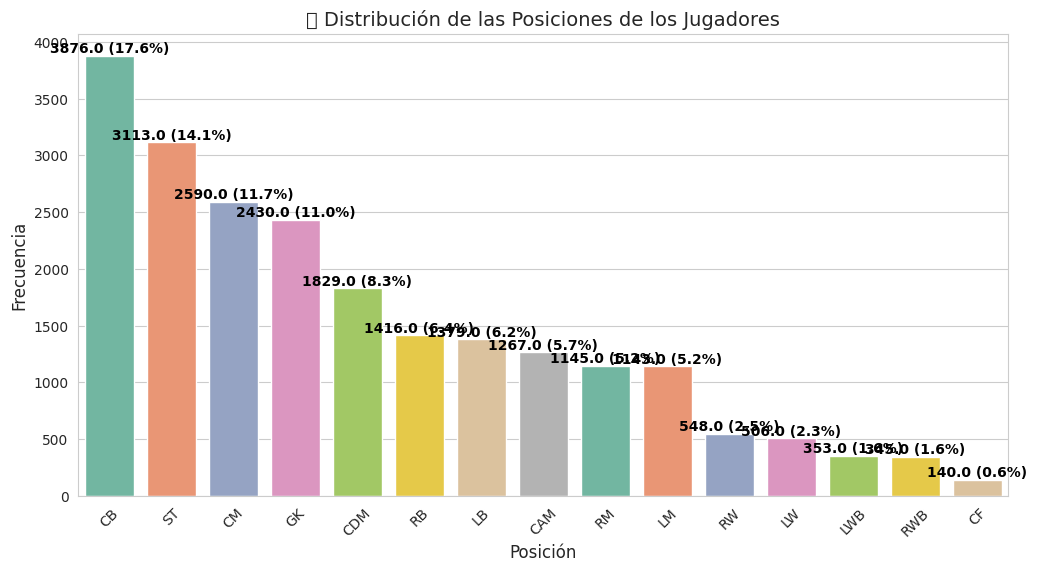


📊 **Frecuencia de Posiciones (%)** 📊

position
CB     17.554348
ST     14.098732
CM     11.730072
GK     11.005435
CDM     8.283514
RB      6.413043
LB      6.245471
CAM     5.738225
RM      5.185688
LM      5.176630
RW      2.481884
LW      2.291667
LWB     1.598732
RWB     1.562500
CF      0.634058


In [62]:
# 1️⃣ Frecuencia de las posiciones
position_freq = dt_data['position'].value_counts(normalize=True) * 100  # Convertir a porcentaje

# 2️⃣ Visualización de la frecuencia de posiciones
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # Fondo más limpio

ax = sns.countplot(data=dt_data, x='position', palette='Set2', order=position_freq.index)

# Agregar porcentaje sobre cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()} ({p.get_height() / len(dt_data) * 100:.1f}%)',  
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.title('📌 Distribución de las Posiciones de los Jugadores', fontsize=14)
plt.xlabel('Posición', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)  
plt.show()

# 3️⃣ Mostrar frecuencias con mejor formato
print("\n📊 **Frecuencia de Posiciones (%)** 📊\n")
print(position_freq.to_string())


### Frecuencia de Posiciones (%)  

#### Distribución general  
- La posición más común es **Defensa Central (CB)** con **17.55%** de los jugadores.  
- Los delanteros centro (**ST**) representan el **14.10%**, siendo la segunda posición más frecuente.  
- Los mediocampistas centrales (**CM**) y los arqueros (**GK**) ocupan el **11.73%** y **11.01%** respectivamente.  

#### Posiciones más representadas  
- **Defensores**: CB (17.55%), RB (6.41%), LB (6.25%), LWB (1.60%), RWB (1.56%).  
- **Mediocampistas**: CM (11.73%), CDM (8.28%), CAM (5.74%), RM (5.19%), LM (5.18%).  
- **Delanteros**: ST (14.10%), RW (2.48%), LW (2.29%), CF (0.63%).  

#### Observaciones  
- Los defensores centrales (**CB**) y delanteros centro (**ST**) son las posiciones más comunes.  
- Las posiciones más ofensivas como **CF, RW y LW** tienen una menor representación en la base de datos.  
- La posición de **Carrilero Derecho (RWB) y Carrilero Izquierdo (LWB)** son poco frecuentes, representando menos del **2%** cada una.  

#### Comentarios generales  
- Se observa una mayor cantidad de jugadores en posiciones defensivas y en el centro del campo.  
- Sería interesante analizar si hay diferencias en la valoración general o en el valor de mercado según la posición.  

# Club_country

/tmp/ipykernel_39/4150299385.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dt_data, x='club_country', palette='Set1', order=club_country_freq.index)
/root/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


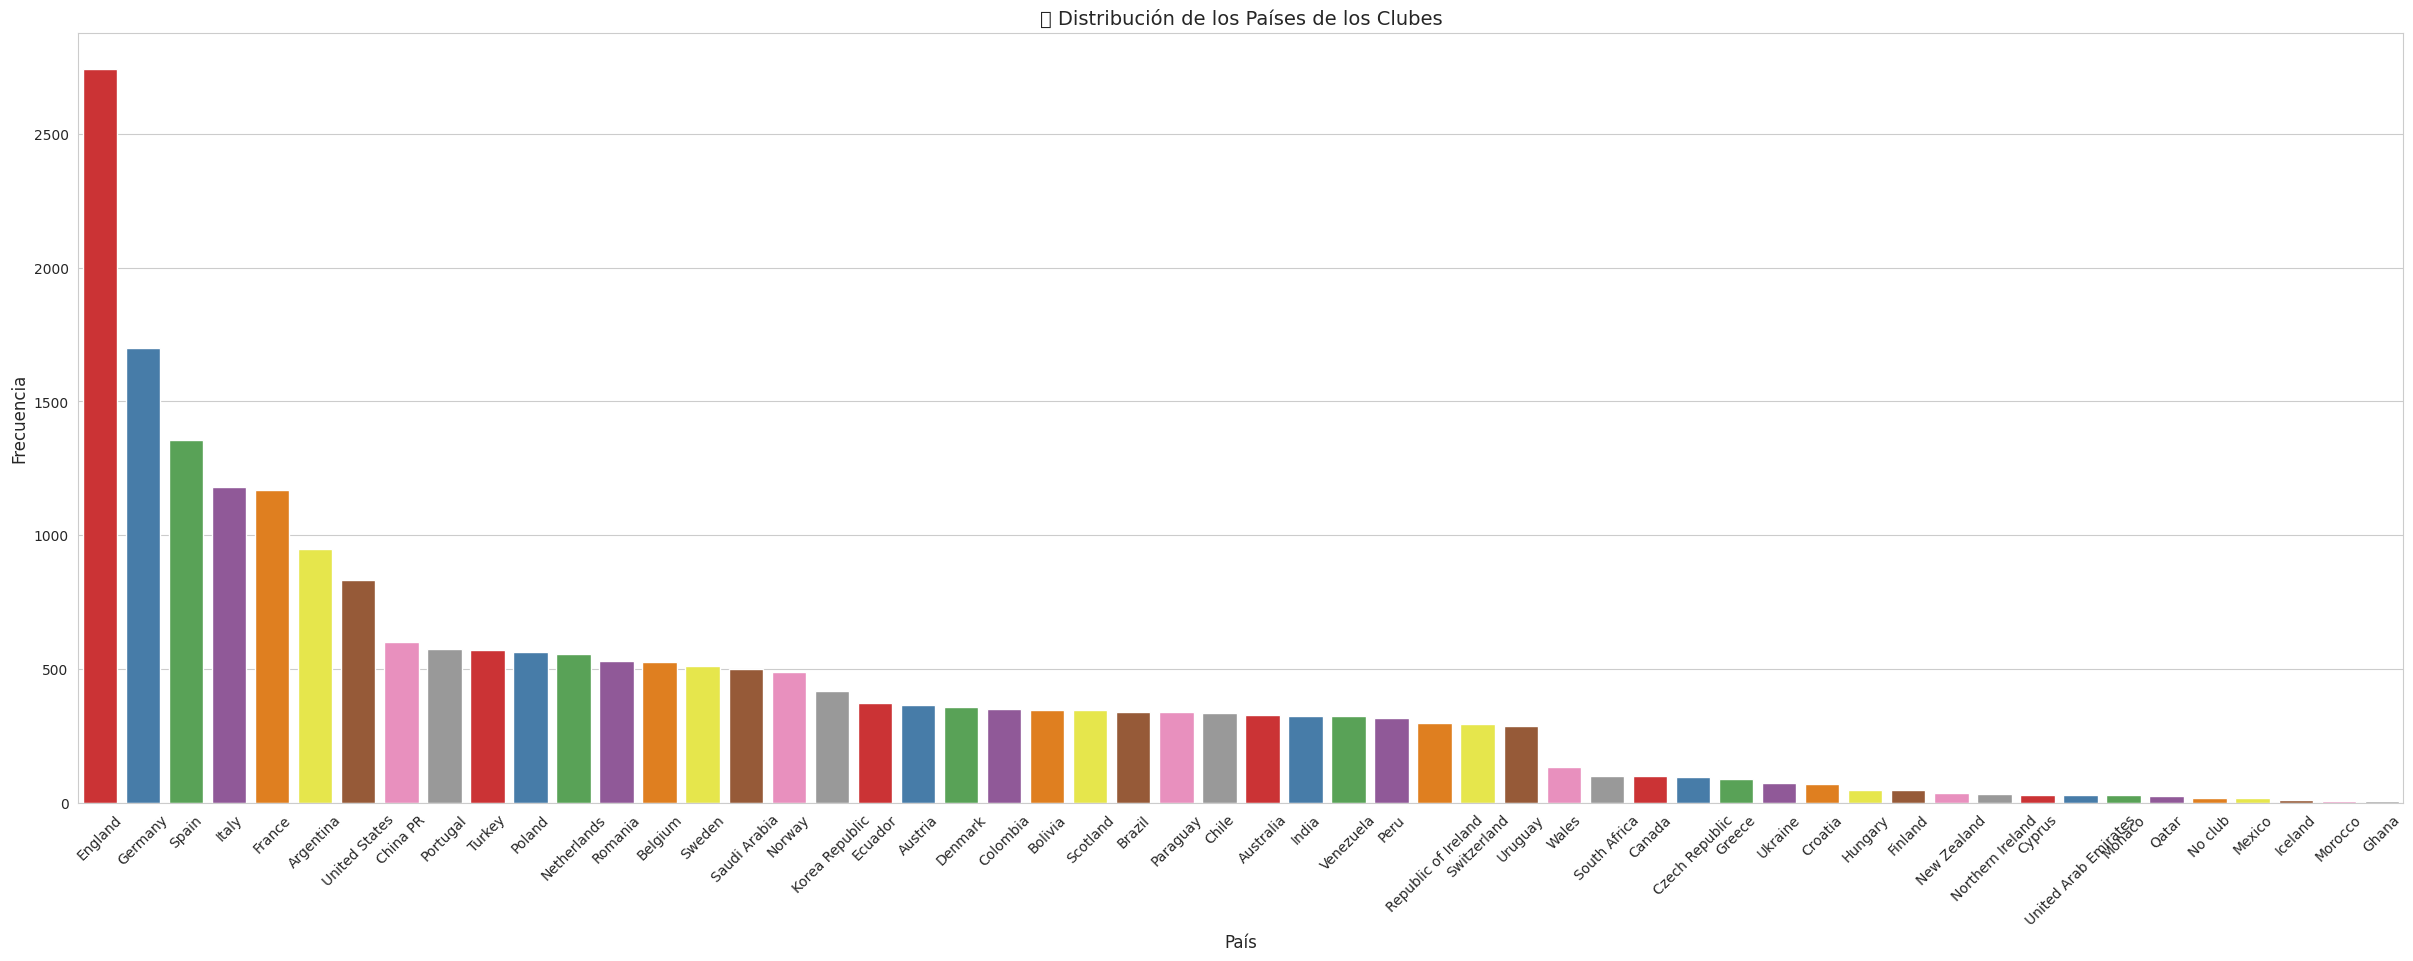


📊 **Frecuencia de Países de Clubes (%)** 📊

club_country
England                 12.413949
Germany                  7.699275
Spain                    6.136775
Italy                    5.335145
France                   5.285326
Argentina                4.298007
United States            3.768116
China PR                 2.717391
Portugal                 2.608696
Turkey                   2.581522
Poland                   2.545290
Netherlands              2.513587
Romania                  2.391304
Belgium                  2.386775
Sweden                   2.305254
Saudi Arabia             2.269022
Norway                   2.219203
Korea Republic           1.897645
Ecuador                  1.684783
Austria                  1.657609
Denmark                  1.621377
Colombia                 1.585145
Bolivia                  1.571558
Scotland                 1.567029
Brazil                   1.539855
Paraguay                 1.530797
Chile                    1.521739
Australia               

In [47]:


# 1️⃣ Frecuencia de los países de los clubes (en porcentaje)
club_country_freq = dt_data['club_country'].value_counts(normalize=True) * 100  

# 2️⃣ Visualización de la frecuencia de países de los clubes (sin porcentajes en el gráfico)
plt.figure(figsize=(30, 10))  # Ajustar tamaño para mejor visibilidad
sns.set_style("whitegrid")  

sns.countplot(data=dt_data, x='club_country', palette='Set1', order=club_country_freq.index)

plt.title('📌 Distribución de los Países de los Clubes', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)  
plt.show()

# 3️⃣ Mostrar frecuencias con mejor formato
print("\n📊 **Frecuencia de Países de Clubes (%)** 📊\n")
print(club_country_freq.to_string())



### **Frecuencia de Países de Clubes (%)**  

#### **Principales países con mayor representación**  
1. **Inglaterra**: 12.41%  
2. **Alemania**: 7.70%  
3. **España**: 6.14%  
4. **Italia**: 5.34%  
5. **Francia**: 5.29%  

Estos cinco países concentran una gran cantidad de clubes y jugadores, reflejando la importancia de sus ligas en el fútbol mundial.  

#### **Distribución por regiones**  

##### **Europa** (Dominante en el listado)  
- Inglaterra (12.41%)  
- Alemania (7.70%)  
- España (6.14%)  
- Italia (5.34%)  
- Francia (5.29%)  
- Portugal, Turquía, Países Bajos, Bélgica y otros países europeos tienen representación significativa (~2-3%).  

##### **América**  
- **Argentina (4.30%)** es el país latinoamericano con más presencia, seguido de:  
  - **Estados Unidos (3.77%)**  
  - **Ecuador, Colombia, Bolivia, Paraguay, Chile, Brasil, Venezuela y Perú** (~1.4% - 1.7%).  
- **México tiene una representación muy baja (0.07%)**, lo que sugiere una subrepresentación de su liga.  

##### **Asia y Medio Oriente**  
- **China (2.72%)** y **Arabia Saudita (2.27%)** lideran en esta región.  
- **India, Corea del Sur y Emiratos Árabes Unidos** tienen una pequeña presencia.  

##### **África y Oceanía**  
- **Sudáfrica (0.45%)** es el país africano con más clubes en la lista.  
- **Nueva Zelanda (0.17%)** representa a Oceanía.  
- **Marruecos y Ghana tienen una presencia mínima (<0.03%)**.  

#### **Observaciones**  
- Las ligas de **Europa dominan la representación de clubes**, reflejando su competitividad y atractivo global.  
- **América Latina** tiene presencia, aunque menor en comparación con Europa, a excepción de Argentina.  
- **Asia y Medio Oriente** han crecido en representación, con China y Arabia Saudita como los mercados más destacados.  
- **México sorprendentemente tiene una representación muy baja**, lo que podría deberse a criterios de inclusión de datos o la preferencia de su liga por jugadores nacionales.  



# Pref_foot

/tmp/ipykernel_39/1334152673.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=dt_data, x='pref_foot', palette='coolwarm', order=pref_foot_freq.index)
/root/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


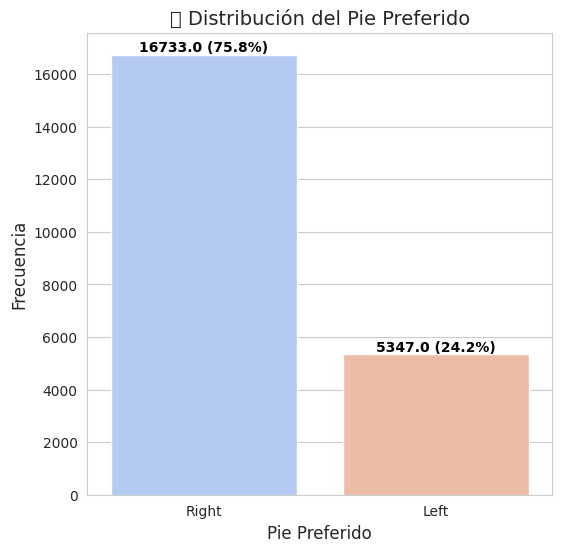


📊 **Frecuencia del Pie Preferido (%)** 📊

pref_foot
Right    75.783514
Left     24.216486


In [49]:
# 1️⃣ Frecuencia del pie preferido (en porcentaje)
pref_foot_freq = dt_data['pref_foot'].value_counts(normalize=True) * 100  

# 2️⃣ Visualización de la frecuencia del pie preferido
plt.figure(figsize=(6, 6))
sns.set_style("whitegrid")  

ax = sns.countplot(data=dt_data, x='pref_foot', palette='coolwarm', order=pref_foot_freq.index)

# Agregar porcentaje sobre cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()} ({p.get_height() / len(dt_data) * 100:.1f}%)',  
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.title('📌 Distribución del Pie Preferido', fontsize=14)
plt.xlabel('Pie Preferido', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

# 3️⃣ Mostrar frecuencias con mejor formato
print("\n📊 **Frecuencia del Pie Preferido (%)** 📊\n")
print(pref_foot_freq.to_string())


### **Frecuencia del Pie Preferido (%)**  

- **Diestros (Right):** 75.78%  
- **Zurdos (Left):** 24.22%  

#### **Análisis**  
- La gran mayoría de los jugadores prefieren el **pie derecho** (más del 75%), lo que es una tendencia común en el fútbol.  
- Solo **1 de cada 4 jugadores es zurdo**, lo que hace que los jugadores zurdos sean más escasos y, en algunos casos, más valorados tácticamente.  

#### **Implicaciones en el Juego**  
- **Laterales y extremos zurdos** suelen ser más codiciados porque hay menos jugadores naturales para esas posiciones.  
- **Centrales zurdos** también son valiosos, ya que permiten una mejor salida de balón por ese lado.  
- **Ambidiestros** no aparecen en la lista, pero algunos jugadores tienen gran capacidad con ambos pies, lo que los hace más versátiles.  


# 3
Un miembro del cuerpo técnico asegura que los arqueros (GK) altos tienen un mejor
desempeño (overall). ¿Qué puede afirmar usted a través de un análisis descriptivo?
(Nota: tome por definición tres grupos de estatura: i) menor a 185 cm; ii) entre 185 y
192 cm; iii) más de 192 cm)


In [19]:
# Filtrar solo arqueros (GK)
gk_data = dt_data[dt_data['position'] == 'GK']

# Agrupar por estatura
i = gk_data[gk_data['height_cm'] <= 185]
ii = gk_data[(gk_data['height_cm'] > 185) & (gk_data['height_cm'] <= 192)]
iii = gk_data[gk_data['height_cm'] > 192]

# Calcular estadísticas descriptivas del overall por grupo
stats = {
    "Grupo < 185 cm": i['overall'].describe(),
    "Grupo 185-192 cm": ii['overall'].describe(),
    "Grupo > 192 cm": iii['overall'].describe()
}

# Convertir a DataFrame para visualizar mejor
stats_df = pd.DataFrame(stats)

# Mostrar resultados
print(stats_df)


       Grupo < 185 cm  Grupo 185-192 cm  Grupo > 192 cm
count       649.00000       1264.000000      517.000000
mean         62.09245         64.481013       64.746615
std           7.25340          7.319944        7.639378
min          48.00000         46.000000       48.000000
25%          56.00000         60.000000       60.000000
50%          62.00000         64.000000       64.000000
75%          67.00000         69.000000       70.000000
max          87.00000         89.000000       90.000000


A partir del análisis descriptivo, obtuvimos la anterior tabla que nos muestra los resultados frente a los arqueros (GK).

1. Mean: El promedio nos dice que el grupo de arqueros < 185 cm tienen ligeramente menor desempeño que los arqueros de 185 a 192 cm y los arqueros > 192 cm.
2. std: Esta desviación estándar es casi igual para todos los grupos. Lo que nos dice que existe una alta variabilidad en cada grupo, es decir, que la diferencia de desempeño entre arqueros del mismo grupo es notable.
3. min: El minimo nos dice que el grupo de arqueros < 185 cm tiene un desempeño de 48 y el grupo de arqueros 185-192 cm tiene un desempeño de 48. Por lo que, el desempeño mínimo de cada grupo es muy similar.
4. max: El máximo al igual que el mínimo son similares sin gran diferencia.
5. Mediana (50%): La mediana nos dice que el grupo de arqueros < 185 cm tiene un desempeño de 62, el grupo de arqueros 185-192 cm tiene un desempeño de 64 y el grupo de arqueros > 192 cm tiene un desempeño de 64. Por lo que esto sugiere que no hay una ventaja significativa al tener distribución central muy similar.

### **Conclusión**  

A partir del análisis descriptivo, se observa que los arqueros con una estatura **menor a 185 cm** presentan un **desempeño promedio ligeramente inferior** en comparación con los grupos de mayor altura. Sin embargo, la diferencia entre los arqueros de **185-192 cm y los de más de 192 cm es mínima**, lo que indica que ser más alto no necesariamente garantiza un mejor rendimiento.  

La **desviación estándar es similar en todos los grupos**, lo que refleja una alta variabilidad en el desempeño dentro de cada categoría de altura. Además, los valores **mínimos y máximos son muy similares**, lo que sugiere que hay arqueros de todos los niveles en cada grupo de estatura.  

Finalmente, la **mediana del rendimiento es prácticamente igual en los dos grupos más altos (64),** lo que refuerza la idea de que **no hay una ventaja significativa en el desempeño al superar los 192 cm**. Por lo tanto, si bien los arqueros más bajos parecen estar en ligera desventaja, el miembro del cuerpo técnico no está en lo correcto al decir que una mayor estatura sea un factor determinante para el éxito de un arquero.

# 4 
Un analista afirma que los jugadores zurdos, tienen un mejor desempeño (overall) que
los diestros. ¿Qué puede decir sobre esta afirmación a través de un análisis
descriptivo? 

In [33]:
# Filtrar por pie preferido
left_foot = dt_data[dt_data['pref_foot'] == 'Left']
right_foot = dt_data[dt_data['pref_foot'] == 'Right']

stats = {
    "Zurdos": left_foot['overall'].describe(),
    "Diestros": right_foot['overall'].describe()
}

stats_df = pd.DataFrame(stats)

print(stats_df)


            Zurdos      Diestros
count  5347.000000  16733.000000
mean     65.766037     65.050738
std       6.548680      6.875354
min      46.000000     46.000000
25%      62.000000     61.000000
50%      66.000000     65.000000
75%      70.000000     69.000000
max      91.000000     91.000000


A partir del análisis descriptivo, se pueden hacer las siguientes observaciones:  

1. Mean: Los jugadores zurdos tienen un desempeño ligeramente superior (65.77) en comparación con los diestros (65.05). Sin embargo, la diferencia es pequeña (≈0.72 puntos), por lo que no es un factor determinante.  

2. std: La desviación estándar es mayor en los diestros (6.88 vs. 6.55), lo que indica que el desempeño de los jugadores diestros es más disperso, es decir, hay una mayor variabilidad en su nivel de rendimiento.  

3. Rango (`min` y `max`): Los valores mínimos y máximos son iguales en ambos grupos (46 y 91), lo que indica que hay jugadores tanto muy malos como muy buenos en ambas categorías.  

4. Mediana (50%): La mediana también es ligeramente mayor en los zurdos (66) frente a los diestros (65), lo que sugiere que la tendencia central favorece a los zurdos, aunque la diferencia sigue siendo mínima. 

### Conclusión
Si bien los jugadores zurdos presentan un promedio y mediana ligeramente superiores, la diferencia es mínima. No hay evidencia concluyente para afirmar que los jugadores zurdos tienen un mejor desempeño que los diestros de manera significativa. La distribución de rendimiento es similar en ambos grupos, con un rango idéntico y una diferencia de media muy pequeña. Por lo tanto, la afirmación del analista no es del todo cierta.

# 5 
Un scout asegura que los mejores jugadores, según el puntaje de desempeño (overall),
juegan en clubes que pertenecen al grupo de “ligas top5” (Inglaterra, España,
Alemania, Italia y Francia). ¿Qué puede decir sobre estas dos afirmaciones a través de
un análisis descriptivo? 

In [19]:
# Definir las ligas top 5
top_5_leagues = ['England', 'Spain', 'Germany', 'Italy', 'France']

# Aquí creamos dos grupos de datos, los jugadores que están en top 5 de las ligas y lo que están en otros países
top_5_players = dt_data[dt_data['club_country'].isin(top_5_leagues)]
non_top_5_players = dt_data[~dt_data['club_country'].isin(top_5_leagues)]

stats = {
    "Ligas Top 5": top_5_players['overall'].describe(),
    "Otras Ligas": non_top_5_players['overall'].describe()
}

stats_df = pd.DataFrame(stats)

print(stats_df)


       Ligas Top 5   Otras Ligas
count  8141.000000  13939.000000
mean     66.844122     64.277710
std       7.268095      6.329658
min      48.000000     46.000000
25%      62.000000     60.000000
50%      66.000000     65.000000
75%      72.000000     68.000000
max      91.000000     87.000000


A partir del análisis descriptivo, se pueden hacer las siguientes observaciones:  

1. Mean: Los jugadores en las ligas top 5 tienen un desempeño promedio de 66.84, mientras que los de otras ligas tienen 64.28. Esto indica que, en general, los jugadores en las ligas top 5 tienen un mejor rendimiento.  

2, std: La desviación estándar es mayor en las ligas top 5 (7.27) en comparación con otras ligas (6.33). Esto sugiere que el desempeño de los jugadores en las ligas top 5 es más variable, lo que significa que hay tanto jugadores de muy alto rendimiento como de menor rendimiento en estas ligas.  

3. Rango (`min` y `max`):  
  * Ligas top 5: Mínimo de 48, máximo de 91.  
  * Otras ligas: Mínimo de 46, máximo de 87.  
  * El máximo desempeño es mayor en las ligas top 5, lo que sugiere que los mejores jugadores tienden a jugar en estas ligas.  

4. Mediana (50%): La mediana en las ligas top 5 es 66, mientras que en otras ligas es 65. Aunque los jugadores de las ligas top 5 tienen un desempeño ligeramente superior en términos de tendencia central, la diferencia no es muy grande.  

### Conclusión  
Los jugadores en las ligas top 5 tienen un desempeño promedio superior al de los jugadores en otras ligas, y los valores máximos también son más altos, lo que sugiere que los mejores jugadores tienden a jugar en estas ligas. Sin embargo, la diferencia en la mediana no es muy pronunciada, lo que indica que también hay jugadores con buen desempeño en otras ligas. Por lo tanto, la afirmación del scout es parcialmente cierta, ya que si bien los jugadores en las ligas top 5 tienden a tener un mejor desempeño, la diferencia no es tan significativa como para afirmar que todos los mejores jugadores están exclusivamente en estas ligas.

# 6 
Otro scout asegura que la proporción de jugadores zurdos es mayor en la posición de
centro campista (CM) que en la de centro campista ofensivo (CAM). ¿Qué puede decir
sobre esta afirmación?

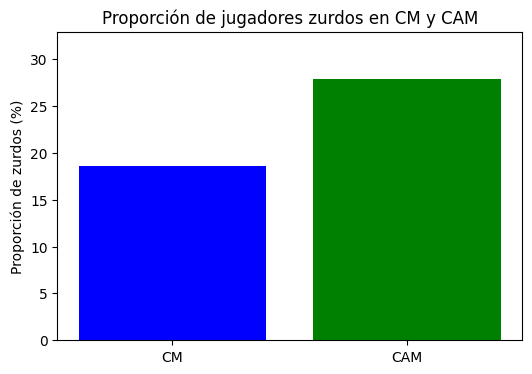

(18.571428571428573, 27.861089187056038)

In [23]:
# Filtrar jugadores por posición y pie preferido
cm_left = dt_data[(dt_data['position'] == 'CM') & (dt_data['pref_foot'] == 'Left')]
cm_total = dt_data[dt_data['position'] == 'CM']

cam_left = dt_data[(dt_data['position'] == 'CAM') & (dt_data['pref_foot'] == 'Left')]
cam_total = dt_data[dt_data['position'] == 'CAM']

# Calcular proporciones
cm_left_ratio = len(cm_left) / len(cm_total) * 100
cam_left_ratio = len(cam_left) / len(cam_total) * 100

# Crear gráfico de barras
positions = ['CM', 'CAM']
ratios = [cm_left_ratio, cam_left_ratio]

plt.figure(figsize=(6, 4))
plt.bar(positions, ratios, color=['blue', 'green'])
plt.ylabel('Proporción de zurdos (%)')
plt.title('Proporción de jugadores zurdos en CM y CAM')
plt.ylim(0, max(ratios) + 5)  
plt.show()

# Mostrar los valores
cm_left_ratio, cam_left_ratio


La proporción de jugadores zurdos es mayor en la posición de centro campista ofensivo (CAM) con un 27.86%, en comparación con los centro campistas (CM) que tienen un 18.57%. Por lo tanto, la afirmación del scout es incorrecta.

# 7
Otro scout asegura que los mejores jugadores juegan en los mejores clubes del mundo
¿Es cierta esta afirmación de que existe una correlación entre el desempeño de los
jugadores (overall) y el puntaje de desempeño del club al que pertenece
(club_overall)?

In [27]:
from scipy.stats import pearsonr

# Calcular la correlación de Pearson
corr_coef, p_value = pearsonr(dt_data['overall'], dt_data['club_overall'])

print("Coeficiente de correlación: ", corr_coef)
print("Valor p: ", p_value)



Coeficiente de correlación:  0.5810285114410456
Valor p:  0.0


El resultado de la correlación indica lo siguiente:

1. Coeficiente de correlación (0.5810)  
   - El coeficiente de correlación de Pearson (\(\rho\)) mide la fuerza y dirección de la relación lineal entre dos variables.
   - Su valor está en el rango de \(-1\) a \(1\):
     - Cercano a 1: Relación positiva fuerte (cuando una variable sube, la otra también).
     - Cercano a -1: Relación negativa fuerte (cuando una variable sube, la otra baja).
     - Cercano a 0: Relación débil o nula.
   - En este caso, 0.5810 indica una correlación positiva moderada a fuerte. Es decir, hay una tendencia a que los jugadores con mejor desempeño (`overall`) pertenezcan a clubes con mejor puntaje (`club_overall`), pero la relación no es completamente determinante.

2. Valor p (0.0000)  
   - El valor p indica la significancia estadística de la correlación.
   - Si \( p < 0.05 \), la correlación es estadísticamente significativa (es poco probable que ocurra por azar).
   - Como el valor p es 0.0000 (prácticamente 0), la correlación es altamente significativa, lo que confirma que la relación entre `overall` y `club_overall` no es aleatoria.

### Conclusión  
Existe una relación positiva moderada a fuerte entre el desempeño de los jugadores y el nivel de su club. Aunque no es una correlación perfecta (no llega a 1), sí indica que los jugadores con mejor rendimiento suelen estar en clubes de alto nivel. Finalmente, la afirmación del scout tiene respaldo estadístico: los mejores jugadores tienden a jugar en los mejores clubes, aunque no es una correlación perfecta.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e7d233be-0a34-41d0-b1e2-29a8a6bfe3d9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>